## **Glassdoor data analysis and modeling**

### __Part 3: EDA - Exploratory Data Analysis__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
# Full display rows option
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,6)})
sns.set_context('talk')
sns.set_style('darkgrid', {'font.sans-serif': ['Bahnschrift', 'DejaVu Sans']})
pd.__version__

'0.23.4'

In [2]:
df = pd.read_csv("dataset/gd_data_cleaned_with_salary_estimate.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,nosql_sk,comp_sc_ql,stat_ql,phd_ql,master_ql,bsc_ql,job_title,job_seniority,job_desc_len,job_competitor_count
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,1,0,0,1,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,1,1,0,1,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,1,1,1,1,0,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,1,1,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,1,1,0,0,0,data scientist,na,2728,3


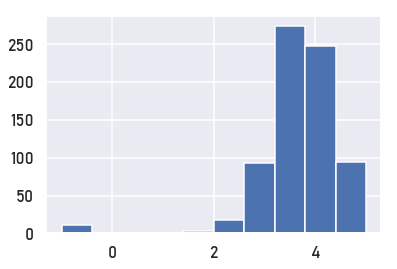

In [4]:
df["Rating"].hist();

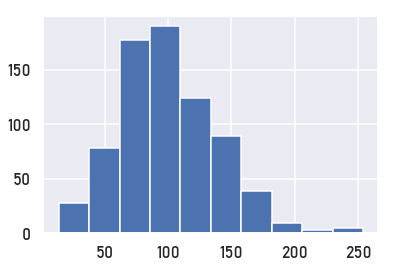

In [5]:
df["avg_salary"].hist();

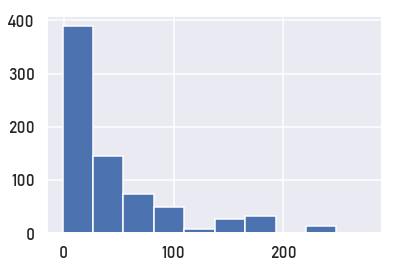

In [6]:
df["age"].hist();

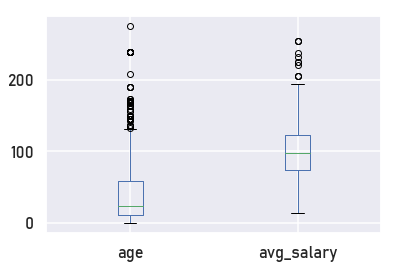

In [8]:
df.boxplot(column=["age", "avg_salary"]);

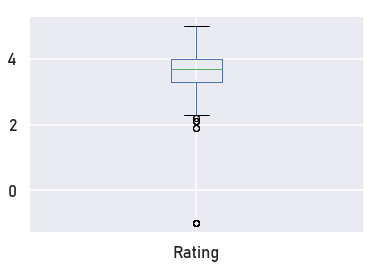

In [9]:
df.boxplot(column=["Rating"]);

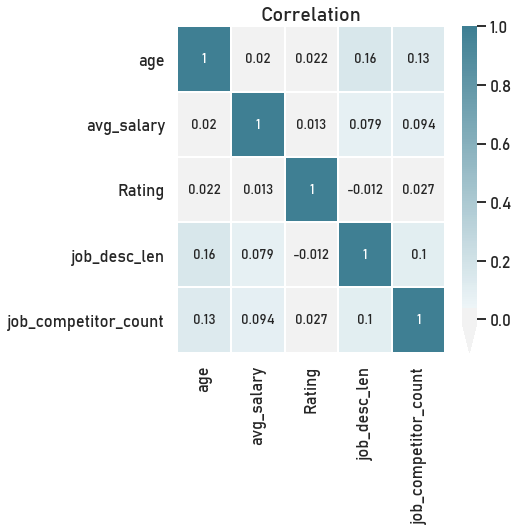

In [10]:
# Cheking multi-colinearity between variables 
corr = df[["age", "avg_salary", "Rating", "job_desc_len", "job_competitor_count"]].corr()

plt.figure(figsize = (6,6))
cmap = sns.diverging_palette(10, 220, as_cmap = True)
cbar_kws = {"orientation":"vertical", 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1, 
           }
annot_kws={'fontsize':14} 
sns.heatmap(corr, 
            center = 0, 
            cmap = cmap, 
            annot = True, 
            annot_kws = annot_kws,  
            linewidths = 1, 
            cbar_kws = cbar_kws);
plt.title('Correlation', fontsize=20)
plt.show();

In [11]:
# df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','company_name', 'state_name', 'same_state_as_hq', 'python_sk','rstudio_sk', 'spark_sk', 'aws_sk', 'excel_sk', 'sql_sk', 'tableau_sk', 'nosql_sk', 'comp_sc_ql', 'stat_ql', 'phd_ql', 'master_ql', 'bsc_ql']]
# for col in df_cat.columns: 
#     cat_num = df_cat[col].value_counts()
#     print(f"Graph for '{col}': {len(cat_num)} indices")
#     chart = sns.barplot(x=cat_num.index, y=cat_num)
#     _ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show();

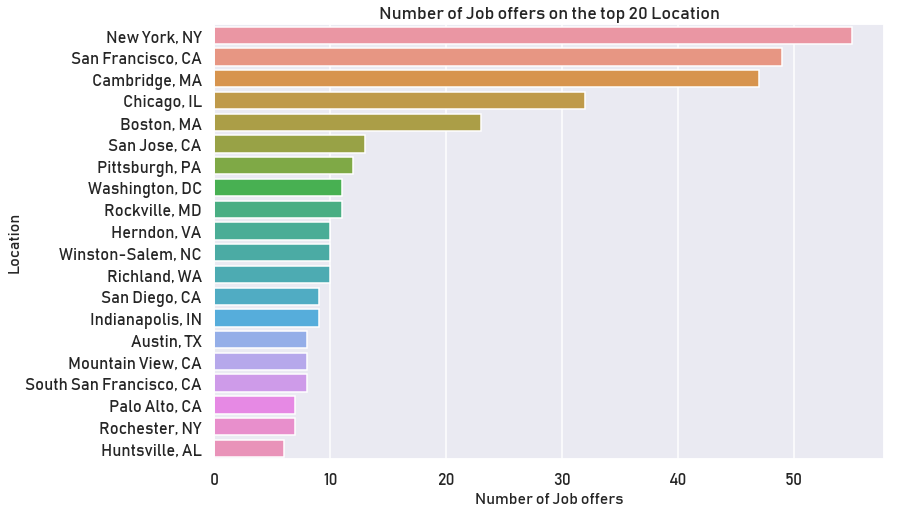

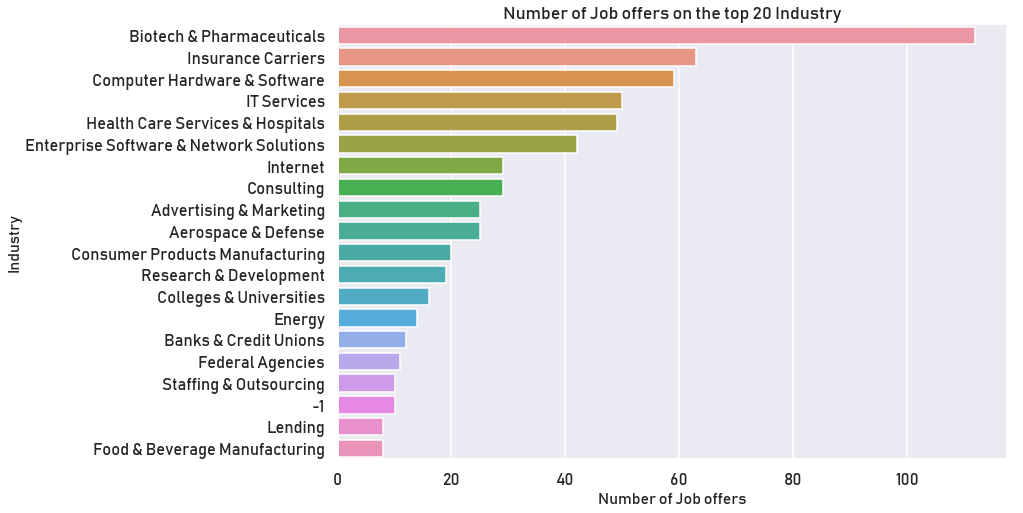

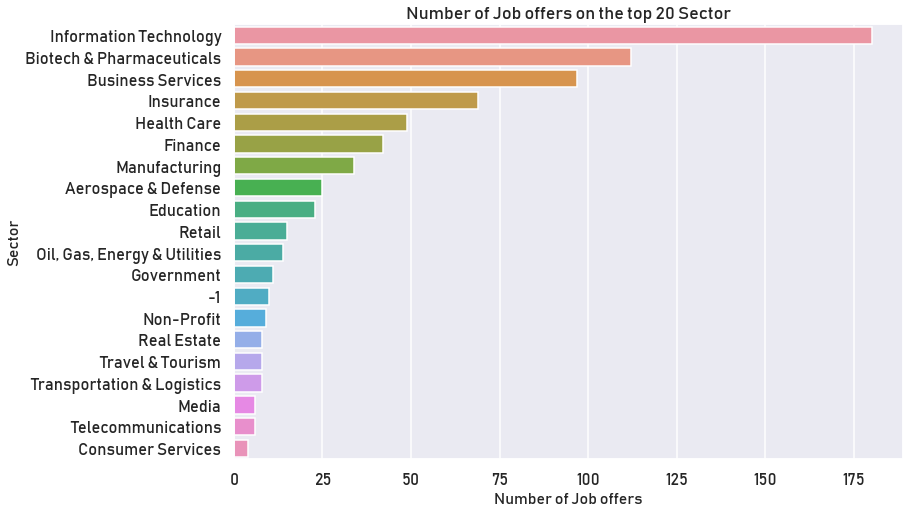

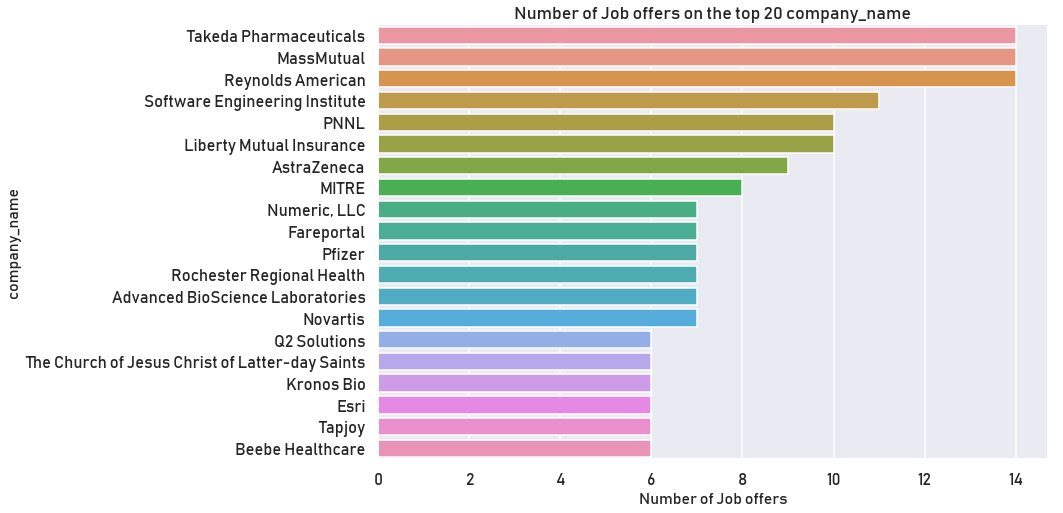

In [12]:
# Filter out the top 20 indices => 
# Top 20 number of job offers by: 
#   - Location
#   - Industries 
#   - Sectors 
#   - Companies  
df_cat_top_20 = df[["Location", "Industry", "Sector", "company_name"]]
for col in df_cat_top_20.columns: 
    cat_num = df_cat_top_20[col].value_counts()[:20]
    _ = plt.figure(figsize=(12,8))
    chart = sns.barplot(x=cat_num, y=cat_num.index)
    _ = plt.title(f"Number of Job offers on the top 20 {col}")
    _ = plt.xlabel('Number of Job offers', fontsize=16)
    _ = plt.ylabel(f'{col}', fontsize=16)
    plt.show();

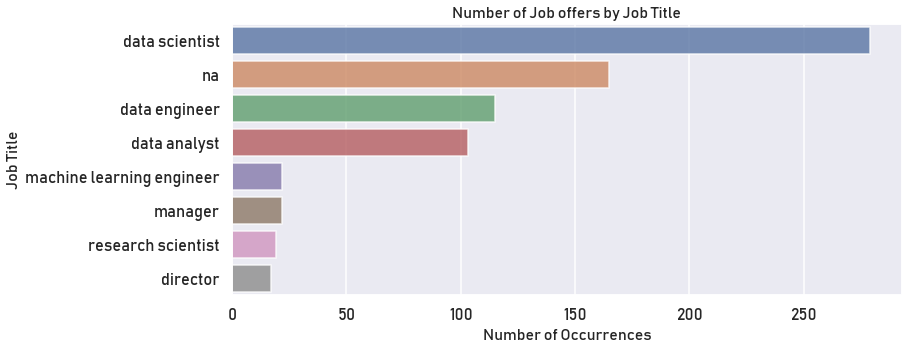

In [13]:
# Number of Jobs offers by Job Title
job_count = df["job_title"].value_counts() # Pandas Series 
plt.figure(figsize=(12,5))
chart = sns.barplot(job_count.values, job_count.index, alpha=0.8)

plt.title('Number of Job offers by Job Title', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=16)
plt.ylabel('Job Title', fontsize=16)
plt.show();

In [14]:
offers_per_ttl_sen = df.groupby('job_title')["job_seniority"].unique()
offers_per_ttl_sen

job_title
data analyst                 [na, junior, senior]
data engineer                        [na, senior]
data scientist               [na, senior, junior]
director                                     [na]
machine learning engineer            [na, senior]
manager                                      [na]
na                                   [na, senior]
research scientist                   [na, senior]
Name: job_seniority, dtype: object

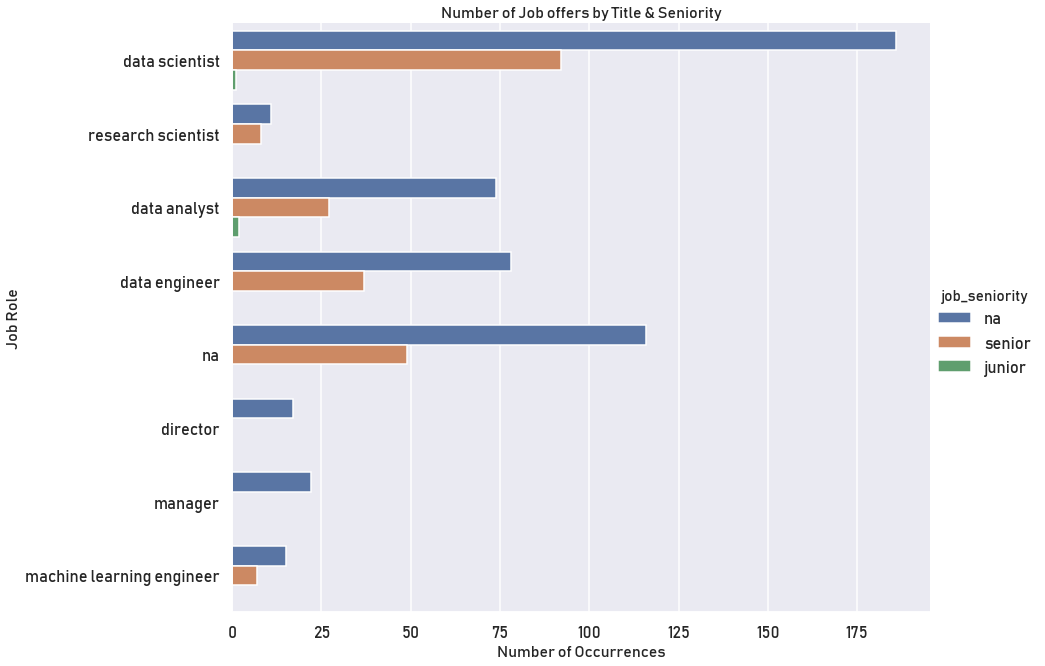

In [15]:
# Number of Job offers by Title & Seniority
sns.catplot(y="job_title", hue="job_seniority", kind="count", data=df, height=9, aspect=1.5)
plt.title('Number of Job offers by Title & Seniority', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=16)
plt.ylabel('Job Role', fontsize=16)
plt.show();

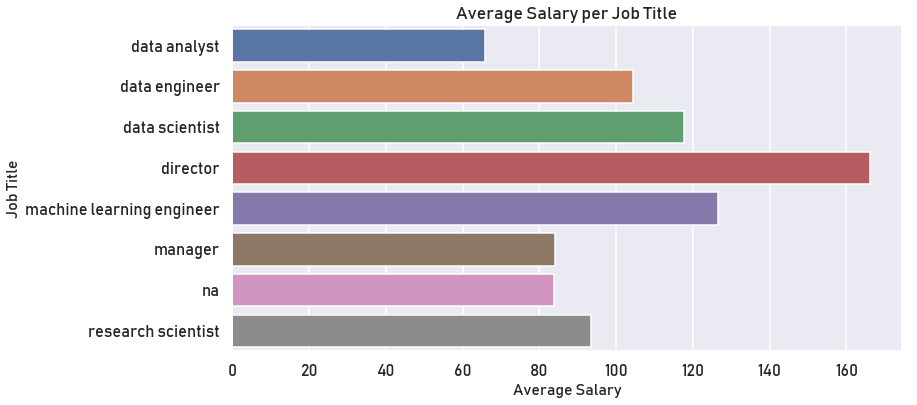

In [16]:
# Average Salary per Job Title 
avg_salary_per_job_title = pd.pivot_table(df, index='job_title', values='avg_salary') # Pandas DataFrame
plt.figure(figsize=(12,6))
# avg_salary_per_job_title = df.groupby('job_title').agg({'avg_salary': np.mean})
chart = sns.barplot(x=avg_salary_per_job_title["avg_salary"], y=avg_salary_per_job_title.index)

plt.title('Average Salary per Job Title')
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('Job Title', fontsize=16)
plt.show();

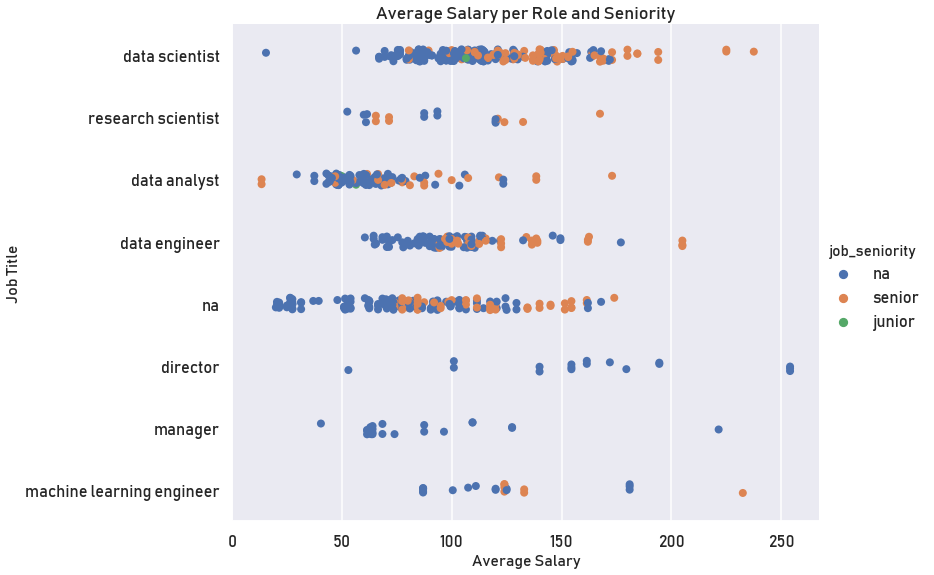

In [17]:
# Average Salary per Job Title & Seniority
# avg_sal_per_title_seniority = pd.pivot_table(df, index=['job_title',  'job_seniority'], values=['avg_salary']) # Pandas DataFrame
#df.groupby(['job_title', 'job_seniority']).agg({'avg_salary': np.mean})

char = sns.catplot(y="job_title", x="avg_salary", hue="job_seniority", data=df, s=8, height=8, aspect=1.5)
plt.title('Average Salary per Role and Seniority')
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('Job Title', fontsize=16)
plt.show();

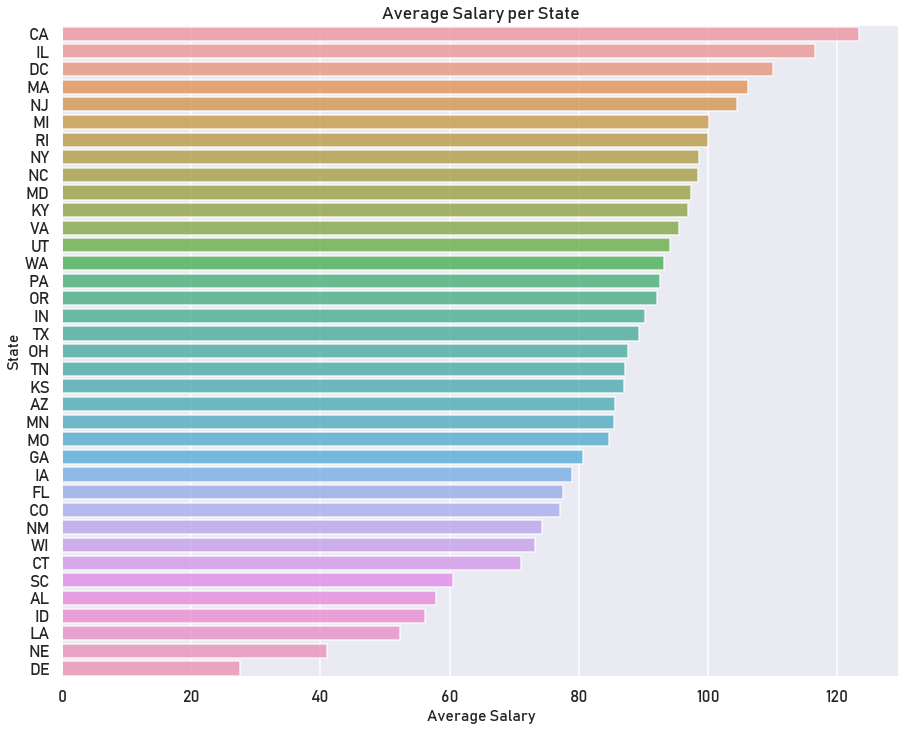

In [18]:
# Average Salary per State 
avg_salary_per_state = pd.pivot_table(df, index='state_name', values='avg_salary').sort_values('avg_salary', ascending=False)
#avg_salary_per_state = df.groupby(['state_name']).agg({'avg_salary': np.mean}).sort_values('avg_salary', ascending=False)
plt.figure(figsize=(15,12))
chart = sns.barplot(avg_salary_per_state["avg_salary"], avg_salary_per_state.index, alpha=0.8)

plt.title('Average Salary per State')
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.show();

In [19]:
# Average Salary per State & Job Title
#pd.pivot_table(df, index=['state_name', 'job_title'], values='avg_salary').sort_values('state_name')

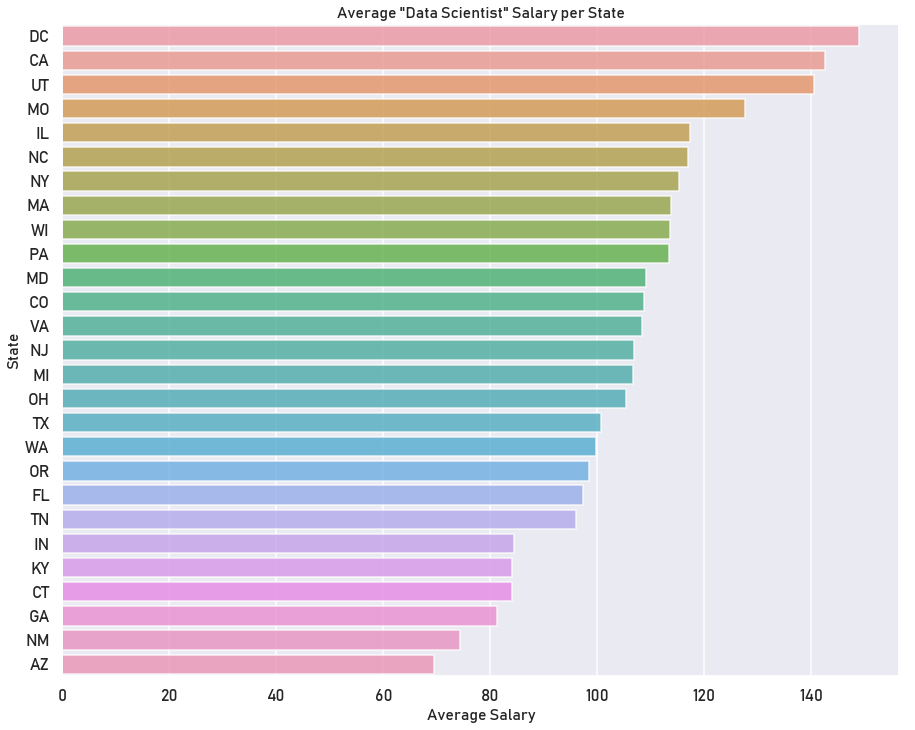

In [20]:
# Average Data Scientist Salary by State 
avg_ds_sal_per_state = pd.pivot_table(df[df["job_title"] == "data scientist"], index=['state_name'], values='avg_salary').sort_values('avg_salary', ascending=False)

plt.figure(figsize=(15,12))
chart = sns.barplot(avg_ds_sal_per_state["avg_salary"], avg_ds_sal_per_state.index, alpha=0.8)

plt.title('Average "Data Scientist" Salary per State', fontsize=16)
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.show();

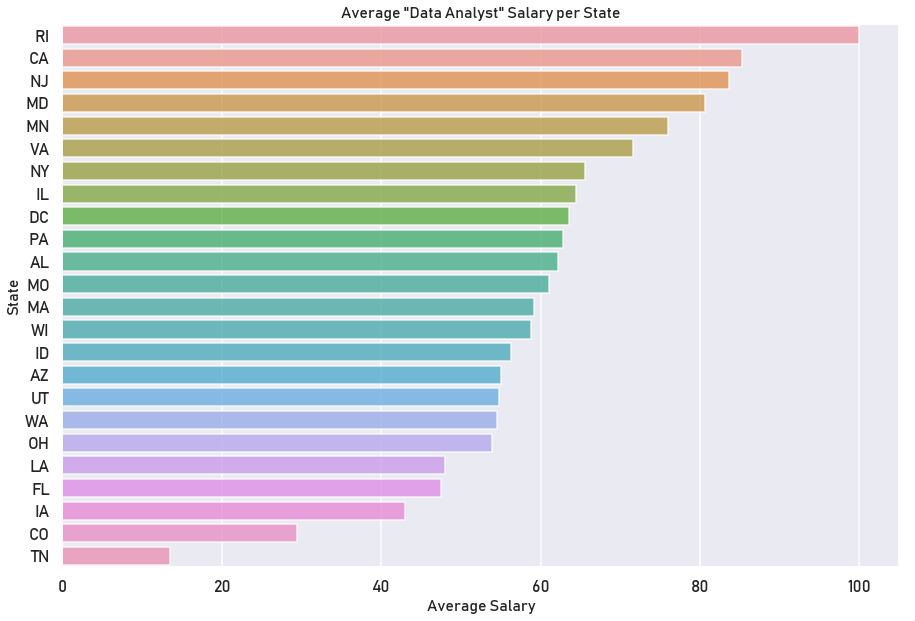

In [21]:
# Average Data Analyst Salary by State 
avg_da_sal_per_state = pd.pivot_table(df[df["job_title"] == "data analyst"], index=['state_name'], values='avg_salary').sort_values('avg_salary', ascending=False)

plt.figure(figsize=(15,10))
chart = sns.barplot(avg_da_sal_per_state["avg_salary"], avg_da_sal_per_state.index, alpha=0.8)
plt.title('Average "Data Analyst" Salary per State', fontsize=16)
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.show();

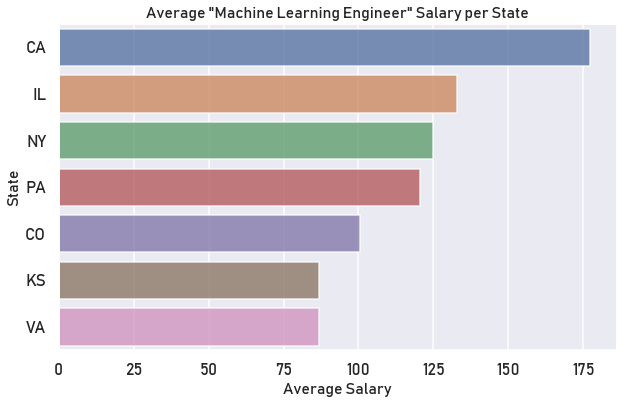

In [22]:
# Average Machine Learning Engineer Salary by State 
avg_mle_sal_per_state = pd.pivot_table(df[df["job_title"] == "machine learning engineer"], index=['state_name'], values='avg_salary').sort_values('avg_salary', ascending=False)

plt.figure(figsize=(10,6))
chart = sns.barplot(avg_mle_sal_per_state["avg_salary"], avg_mle_sal_per_state.index, alpha=0.8)
plt.title('Average "Machine Learning Engineer" Salary per State', fontsize=16)
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.show();

In [23]:
# Rating, Industry, Revenue, Number of Competitors, Type of Ownership
cols = ['Rating', 'Industry', 'Sector', 'Revenue', 'job_competitor_count', 'Type of ownership', 'avg_salary']
df_pivots = df[cols]

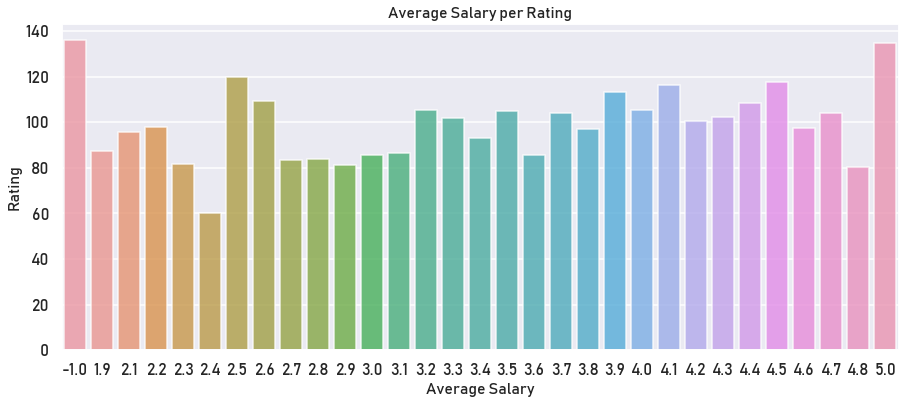

In [24]:
# Average Salary per Rating
avg_salary_rating = pd.pivot_table(df_pivots, index=['Rating'], values='avg_salary').sort_values('avg_salary', ascending=False)

plt.figure(figsize=(15,6))
chart = sns.barplot(avg_salary_rating.index, avg_salary_rating["avg_salary"], alpha=0.8)
plt.title(f'Average Salary per Rating', fontsize=16)
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel(f'Rating', fontsize=16)
plt.show();



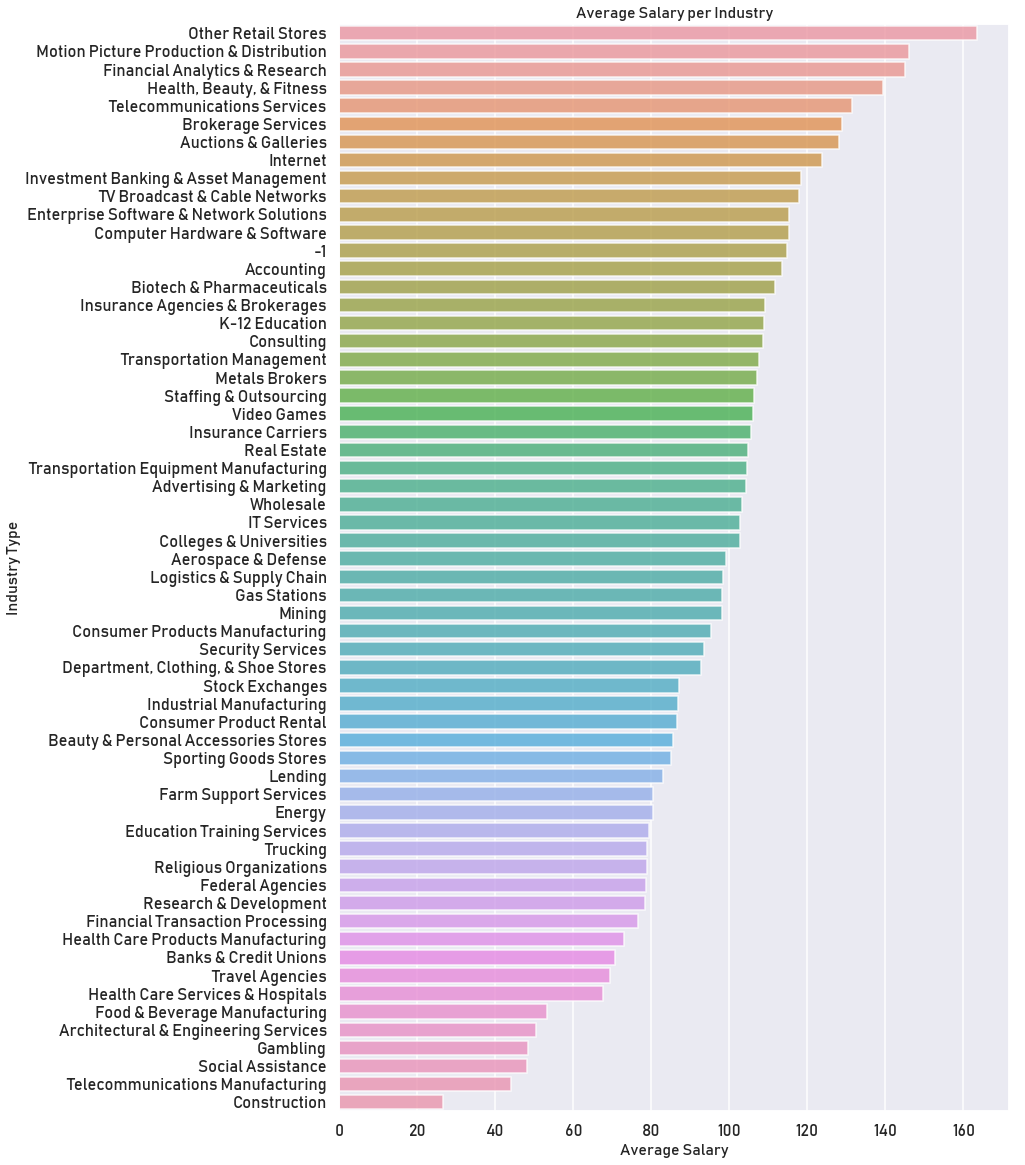

In [25]:
# Average Salary per Industry
avg_salary_industry = pd.pivot_table(df_pivots, index=['Industry'], values='avg_salary').sort_values('avg_salary', ascending=False)

plt.figure(figsize=(12,20))
chart = sns.barplot(avg_salary_industry["avg_salary"], avg_salary_industry.index, alpha=0.8)
plt.title('Average Salary per Industry', fontsize=16)
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('Industry Type', fontsize=16)
plt.show();

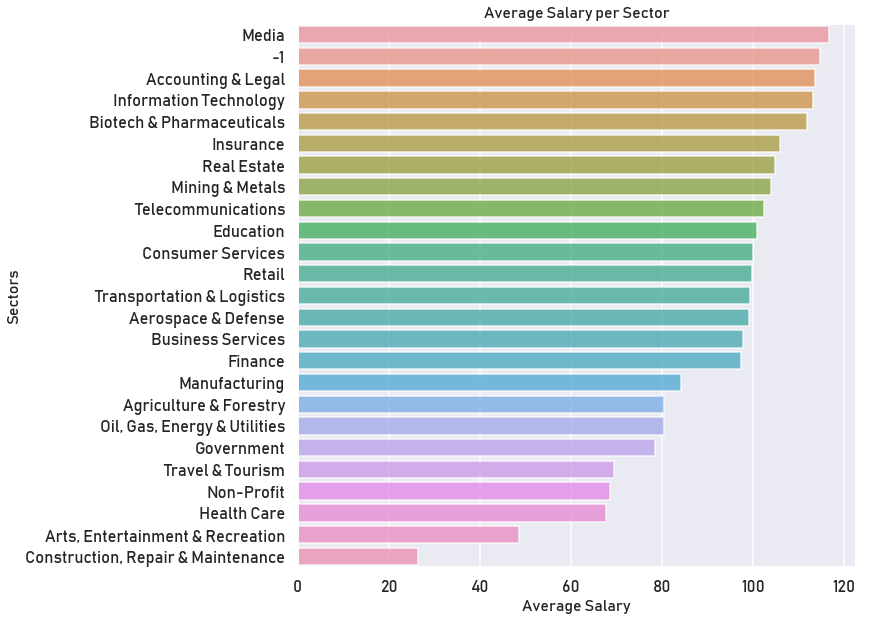

In [26]:
# Average Salary per Sector
avg_salary_industry = pd.pivot_table(df_pivots, index=['Sector'], values='avg_salary').sort_values('avg_salary', ascending=False)

plt.figure(figsize=(10,10))
chart = sns.barplot(avg_salary_industry["avg_salary"], avg_salary_industry.index, alpha=0.8)
plt.title('Average Salary per Sector', fontsize=16)
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('Sectors', fontsize=16)
plt.show();

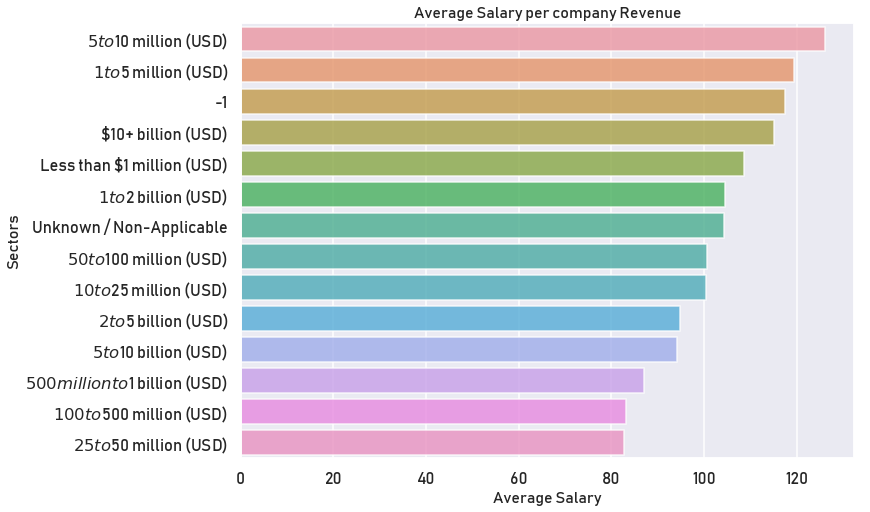

In [27]:
# Average Salary per Revenue 
avg_salary_revenue = pd.pivot_table(df_pivots, index=['Revenue'], values='avg_salary').sort_values('avg_salary', ascending=False)

plt.figure(figsize=(11,8))
chart = sns.barplot(avg_salary_revenue["avg_salary"], avg_salary_revenue.index, alpha=0.8)
plt.title('Average Salary per company Revenue', fontsize=16)
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('Sectors', fontsize=16)
plt.show();

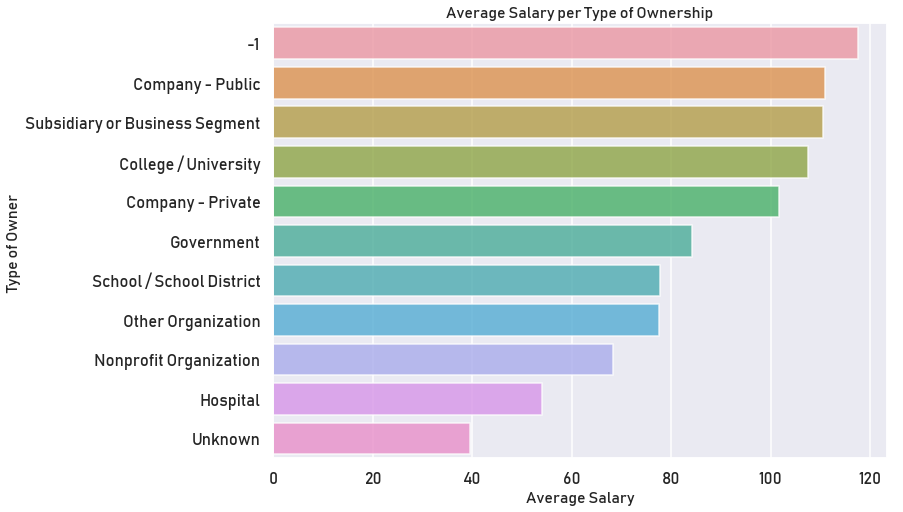

In [28]:
# Average Salary per Type of Ownership 
avg_salary_too = pd.pivot_table(df_pivots, index=['Type of ownership'], values='avg_salary').sort_values('avg_salary', ascending=False)

plt.figure(figsize=(11,8))
chart = sns.barplot(avg_salary_too["avg_salary"], avg_salary_too.index, alpha=0.8)
plt.title('Average Salary per Type of Ownership', fontsize=16)
plt.xlabel('Average Salary', fontsize=16)
plt.ylabel('Type of Owner ', fontsize=16)
plt.show();

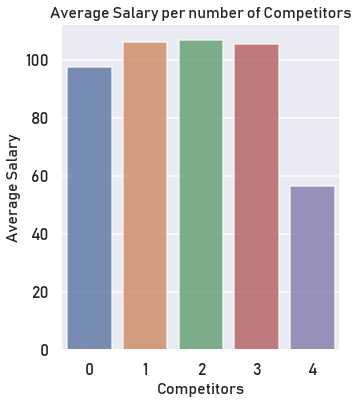

In [29]:
# Average Salary per Number of Competitors 
avg_salary_compt = pd.pivot_table(df_pivots, index=['job_competitor_count'], values='avg_salary').sort_values('avg_salary', ascending=False)
 
plt.figure(figsize=(5,6))
chart = sns.barplot(avg_salary_compt.index, avg_salary_compt["avg_salary"], alpha=0.8)
plt.title('Average Salary per number of Competitors', fontsize=16)
plt.xlabel('Competitors', fontsize=16)
plt.ylabel('Average Salary', fontsize=16) 
plt.show();

In [30]:
# Skills 
# Job Description length 
cols = ['hourly', 'employer_provided']
df_pivots_ohe = df[cols]

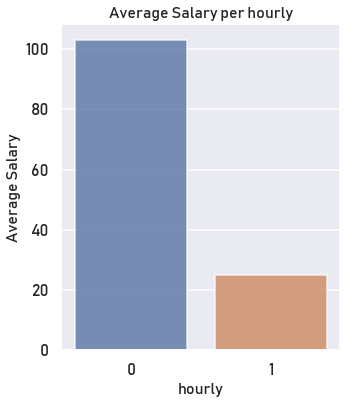

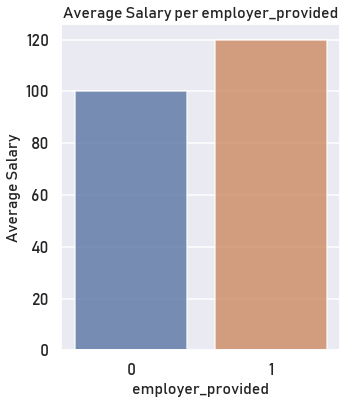

In [31]:
for col in cols:
    avg_salary = pd.pivot_table(df, index=[col], values='avg_salary').sort_values('avg_salary', ascending=False)
    
    _ = plt.figure(figsize=(5,6))
    chart = sns.barplot(avg_salary.index, avg_salary["avg_salary"], alpha=0.8)
    _ = plt.title(f'Average Salary per {col}', fontsize=16)
    _ = plt.xlabel(f'{col}', fontsize=16)
    _ = plt.ylabel('Average Salary', fontsize=16) 
    plt.show();

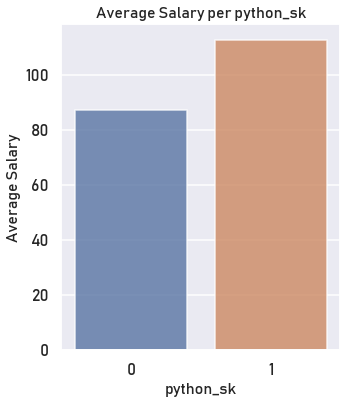

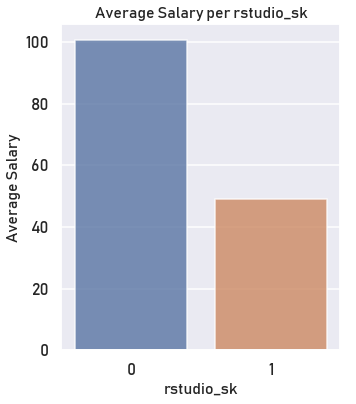

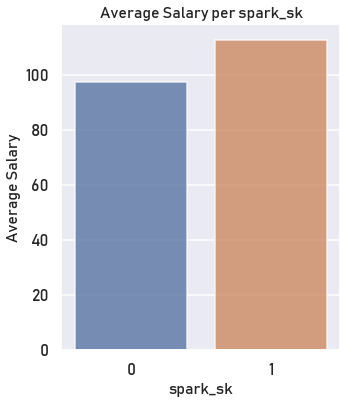

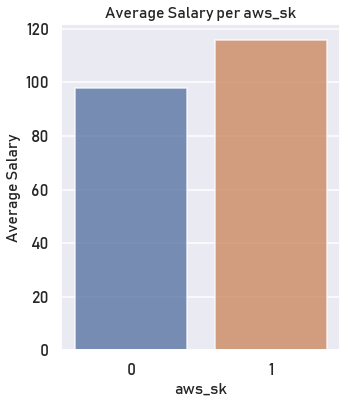

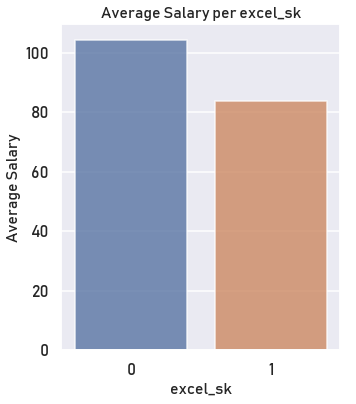

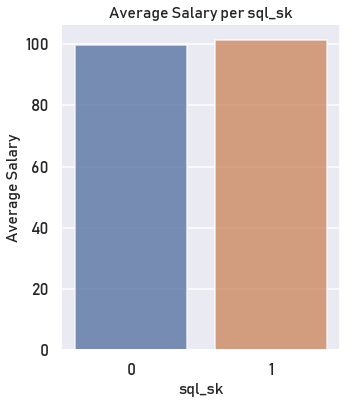

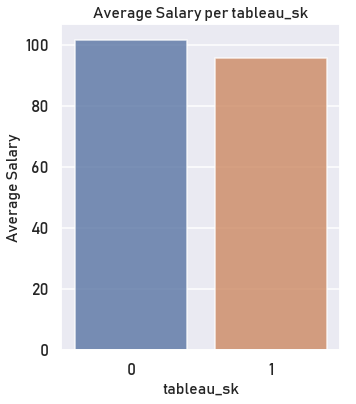

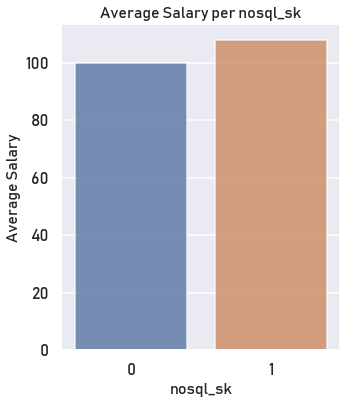

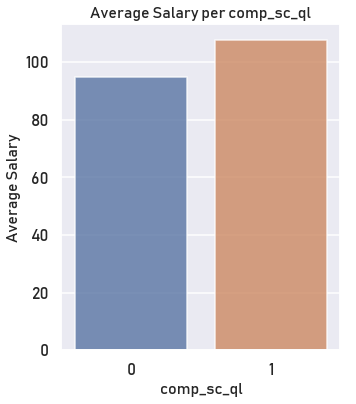

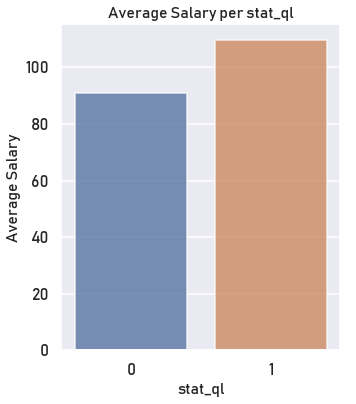

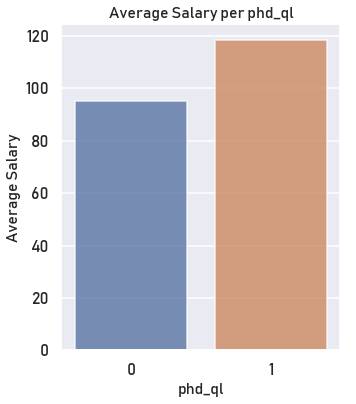

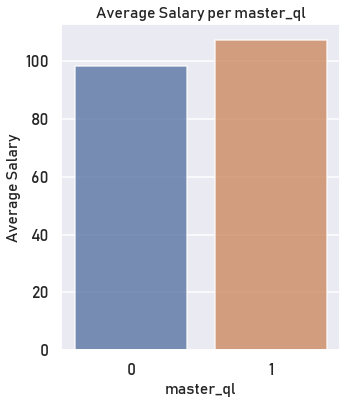

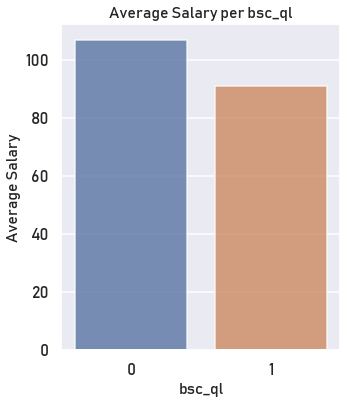

In [32]:
cols = ['python_sk','rstudio_sk', 'spark_sk', 'aws_sk', 'excel_sk', 'sql_sk', 'tableau_sk', 'nosql_sk', 'comp_sc_ql', 'stat_ql', 'phd_ql', 'master_ql', 'bsc_ql']

for col in cols:
    avg_salary = pd.pivot_table(df, index=[col], values='avg_salary').sort_values('avg_salary', ascending=False)
    
    _ = plt.figure(figsize=(5,6))
    chart = sns.barplot(avg_salary.index, avg_salary["avg_salary"], alpha=0.8)
    _ = plt.title(f'Average Salary per {col}', fontsize=16)
    _ = plt.xlabel(f'{col}', fontsize=16)
    _ = plt.ylabel('Average Salary', fontsize=16) 
    plt.show();

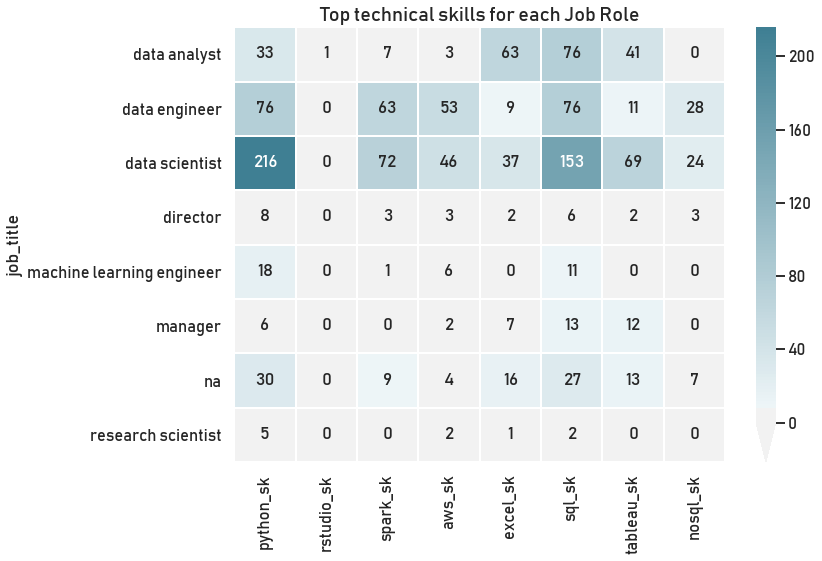

In [33]:
# Top technical skills for each Job Role
cols = ['python_sk','rstudio_sk', 'spark_sk', 'aws_sk', 'excel_sk', 'sql_sk', 'tableau_sk', 'nosql_sk']
top_tech_skills = df.groupby('job_title')[cols].sum()

plt.figure(figsize = (11,8))
cmap = sns.diverging_palette(10, 220, as_cmap = True)
cbar_kws = {"orientation":"vertical", 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1, 
           }
annot_kws={'fontsize':18} 
sns.heatmap(top_tech_skills, 
            center = 0, 
            cmap = cmap, 
            annot = True, 
            annot_kws = annot_kws, 
            fmt = "d", 
            linewidths = 1, 
            cbar_kws = cbar_kws);
plt.title('Top technical skills for each Job Role', fontsize=20)
plt.show();

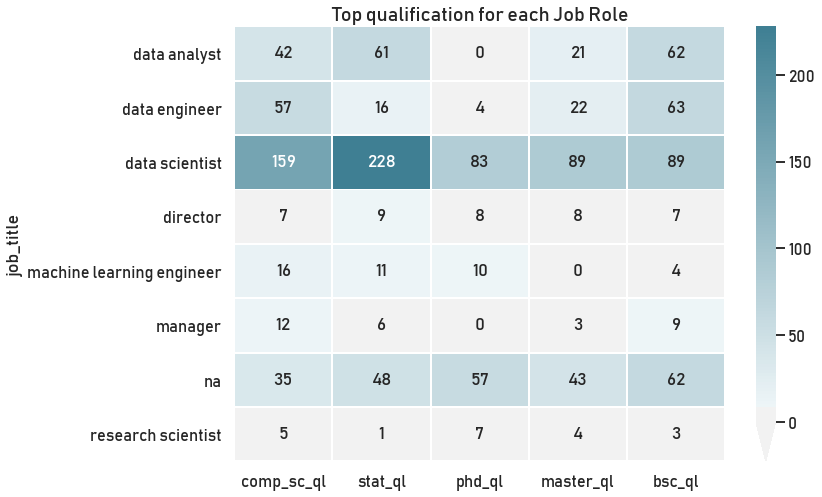

In [34]:
# Top qualification for each Job Role
cols = ['comp_sc_ql', 'stat_ql', 'phd_ql', 'master_ql', 'bsc_ql']
top_qls = df.groupby('job_title')[cols].sum()

plt.figure(figsize = (11,8))
cmap = sns.diverging_palette(10, 220, as_cmap = True)
cbar_kws = {"orientation":"vertical", 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1,
           }
annot_kws={'fontsize':18} 
sns.heatmap(top_qls, 
            center = 0, 
            cmap = cmap, 
            annot = True, 
            annot_kws = annot_kws, 
            fmt = "d", 
            linewidths = 1, 
            cbar_kws = cbar_kws);
plt.title('Top qualification for each Job Role', fontsize=20)
plt.show();

In [35]:
# Plot word-cloud 
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/zero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /home/zero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<Figure size 1440x1296 with 0 Axes>

(-0.5, 799.5, 1499.5, -0.5)

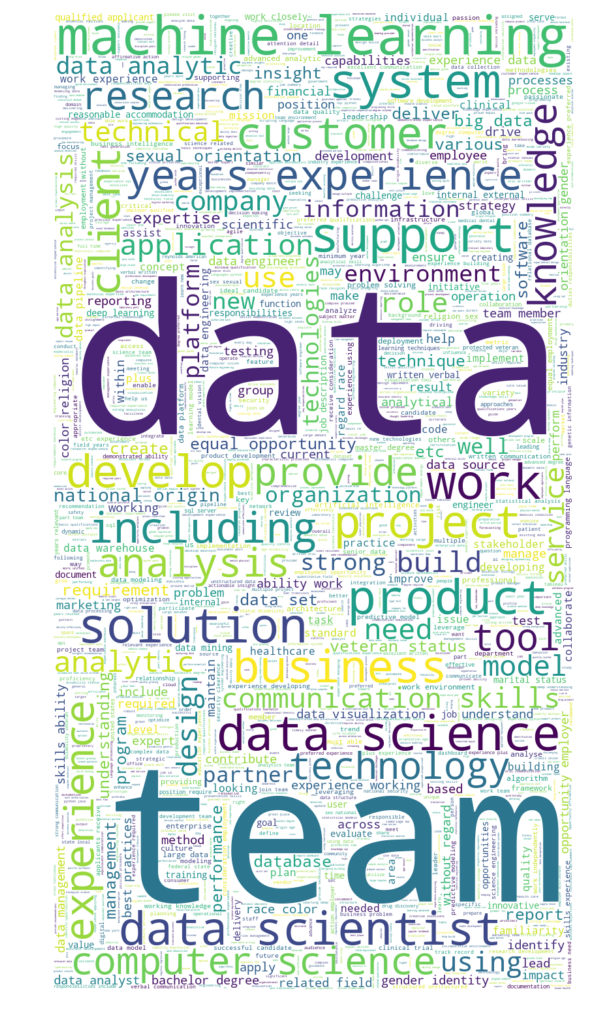

In [36]:
words = " ".join(df['Job Description'])
# Remove Punctations and StopWords
def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])
# 
word_cloud = WordCloud(background_color="white", random_state = 1, stopwords = STOPWORDS, max_words = 2000, width =800, height = 1500)
word_cloud.generate(text)
plt.figure(figsize = [20,18])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
df.columns 

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'state_name', 'same_state_as_hq', 'age', 'python_sk',
       'rstudio_sk', 'spark_sk', 'aws_sk', 'excel_sk', 'sql_sk', 'tableau_sk',
       'nosql_sk', 'comp_sc_ql', 'stat_ql', 'phd_ql', 'master_ql', 'bsc_ql',
       'job_title', 'job_seniority', 'job_desc_len', 'job_competitor_count'],
      dtype='object')